In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import pandas as pd

In [4]:
df1 = pd.read_csv("hh_ru_dataset.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   topic_id                 500000 non-null  object 
 1   topic_creation_date      500000 non-null  object 
 2   initial_state            499166 non-null  object 
 3   final_state              499166 non-null  object 
 4   resume_id                500000 non-null  object 
 5   resume_creation_date     500000 non-null  object 
 6   profession               500000 non-null  object 
 7   gender                   500000 non-null  object 
 8   year_of_birth            500000 non-null  int64  
 9   resume_region            500000 non-null  object 
 10  education_level          499898 non-null  object 
 11  expected_salary          489214 non-null  float64
 12  relocation_status        500000 non-null  object 
 13  business_trip_readiness  500000 non-null  object 
 14  work

In [ ]:
df2 = pd.read_excel("clear_final1.xlsx")
df2.info()

In [3]:
sns.boxplot(y='expected_salary', data=df2, color='green', width=0.8)


NameError: name 'df2' is not defined

In [ ]:
# sns.catplot(y='expected_salary', data=df1, color='green')
# fig, ax = plt.subplots(figsize=(6, 50))
# sns.set(style="whitegrid")
sns.boxplot(y='expected_salary', data=df1, color='green', width=0.8)

In [ ]:
df1['expected_salary'] = df1['expected_salary'] // 1000 * 1000
df1['expected_salary']

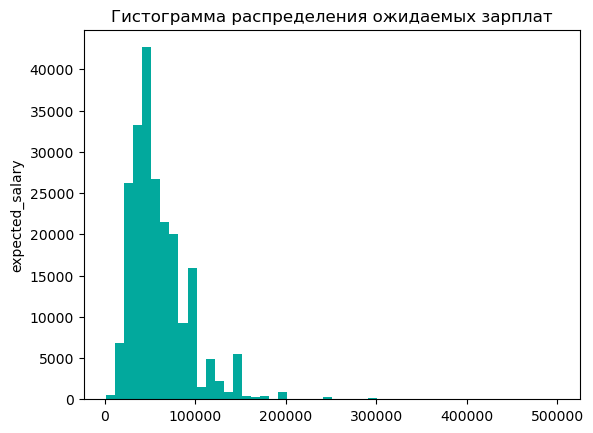

In [6]:
plt.hist(x=df2['expected_salary'], bins=50, color='#02A99D')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('expected_salary')
plt.title('Гистограмма распределения ожидаемых зарплат')
plt.show()

In [11]:
len(df2)

220470

In [ ]:
df1['flag'] = ['До обработки' for i in range(len(df1['year_of_birth']))]
df2['flag'] = ['После обработки' for i in range(len(df2['year_of_birth']))]
df3 = pd.concat([df1[['flag', 'year_of_birth']], df2[['flag', 'year_of_birth']]])
df3
fig, ax = plt.subplots()
sns.set(style="whitegrid")
sns.boxplot(x = 'flag', y='year_of_birth', data=df3, width=0.8, color='#02A99F', ax=ax)
ax.set_title('Распределение годов рождения')
ax.set_ylabel('Год рождения')
ax.set_xlabel('')


In [ ]:
df3 = pd.concat([df1[['flag', 'work_experience_months']], df2[['flag', 'work_experience_months']]])
df3
fig, ax = plt.subplots(figsize=(6, 5))
sns.set(style="whitegrid")
#plt.figure(figsize=(4, 10))
sns.boxplot(x = 'flag', y='work_experience_months', data=df3, width=0.8, color='#02A99F', ax=ax)
ax.set_title('Распределение опыта работы')
ax.set_ylabel('Опыт работы в месяцах')
ax.set_xlabel('')
background_color = ''
plt.show()
# ax.set(facecolor = background_color)
# fig.set(facecolor = background_color)

C:\Users\artyo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


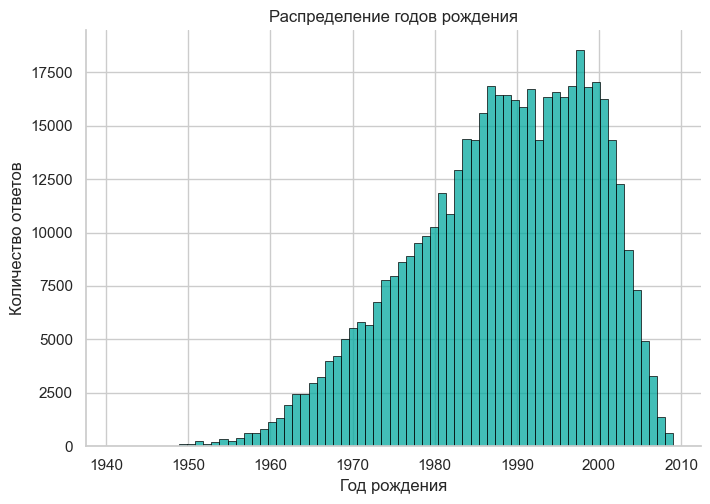

In [9]:
# sns.distplot(df1['year_of_birth'], kde=True, 
#              bins=int(180/5), color = '#2E8B57', 
#              hist_kws={'edgecolor':'#5A3D30'},
#              kde_kws={'linewidth': 3})
# fig, ax = plt.subplots(figsize=(10, 4))
sns.set(style="whitegrid")
hst = sns.displot(x=df1[df1.year_of_birth >= 1940]['year_of_birth'], bins=69, color='#02A99F', edgecolor='black', linewidth=0.5)
#sns.displot(x=df1['year_of_birth'], kind='kde', bw_adjust=2)
hst.fig.set_size_inches(8,5)
hst.set(title='Распределение годов рождения', xlabel='Год рождения', ylabel='Количество ответов')
plt.show()

In [ ]:
df2.nunique()

In [ ]:
df_prof_symbol = pd.read_excel('../datasets/hh_ru/professions.xlsx', sheet_name='symbol')['profession']
df_symbol = df1.loc[df1['profession'].isin(df_prof_symbol)]

df_prof_human = pd.read_excel('../datasets/hh_ru/professions.xlsx', sheet_name='human')['profession']
df_human = df1.loc[df1['profession'].isin(df_prof_human)]

df_prof_machinery = pd.read_excel('../datasets/hh_ru/professions.xlsx', sheet_name='machinery')['profession']
df_machinery = df1.loc[df1['profession'].isin(df_prof_machinery)]

df_prof_art = pd.read_excel('../datasets/hh_ru/professions.xlsx', sheet_name='art')['profession']
df_art = df1.loc[df1['profession'].isin(df_prof_art)]

In [ ]:
b_color = '#543005'
y_color = '#C89242'
dfs = [df_symbol, df_human, df_machinery, df_art]
df_names = ['человек - символ', 'человек - человек', 'человек - техника', 'человек - искусство']
colors = [b_color, y_color]
genders = ['женщины', 'мужчины']
g = {'male': 1, 'female': 0}

with plt.matplotlib.rc_context({'legend.labelcolor': b_color, 
                                'axes.labelcolor': b_color,
                                'axes.edgecolor': b_color,
                                'xtick.labelcolor': b_color,
                                'ytick.labelcolor': b_color}):
    x = pd.Series(range(4))
    width = 1/6
    mult = 0
    fig, ax = plt.subplots(layout='constrained', figsize=(8, 5))
    plt.style='seaborn-darkgrid'
    for gender_name in ('male', 'female'):
        gender = g[gender_name]
        offset = width * mult
        rects = ax.bar(x + offset,
                       [len(df_prof[df_prof['gender'] == gender_name])
                        for df_prof in dfs],
                       width,
                       label=genders[gender], color=colors[gender])
        mult += 1

    ax.set_ylabel('Количество в категории')
    ax.set_xlabel('Группа профессий')
    plt.xticks(rotation=0)
    ax.set_xticks(x + width, df_names)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(top=140000)
    plt.style='seaborn-darkgrid'
    plt.show()

In [ ]:
b_color = '#543005'
y_color = '#C89242'
dfs = [df_symbol, df_human, df_machinery, df_art]
df_names = ['человек - символ', 'человек - человек', 'человек - техника', 'человек - искусство']
colors = [b_color, y_color]
final_states = ['Отказ', 'Приглашение', ]
g = {'discard': 0, 'invitation': 1}

with plt.matplotlib.rc_context({'legend.labelcolor': b_color, 
                                'axes.labelcolor': b_color,
                                'axes.edgecolor': b_color,
                                'xtick.labelcolor': b_color,
                                'ytick.labelcolor': b_color}):
    x = pd.Series(range(4))
    width = 1/6
    mult = 0
    fig, ax = plt.subplots(layout='constrained', figsize=(8, 5))
    plt.style='seaborn-darkgrid'
    for state_name in ('discard', 'invitation', ):
        state = g[state_name]
        offset = width * mult
        rects = ax.bar(x + offset,
                       [len(df_prof[df_prof['final_state'] == state_name])
                        for df_prof in dfs],
                       width,
                       label=final_states[state], color=colors[state])
        mult += 1

    ax.set_ylabel('Количество в категории')
    ax.set_xlabel('Группа профессий')
    plt.xticks(rotation=0)
    ax.set_xticks(x+width, df_names)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(top=90000)
    plt.style='seaborn-darkgrid'
    plt.show()

In [ ]:
x = df1[(df1.initial_state == 'invitation') & (df1.final_state == 'invitation')]['topic_creation_date']

sns.set(style="whitegrid")
hst = sns.displot(x=x, bins=30, color='#02A99F', edgecolor='black', linewidth=0.5)
hst.fig.set_size_inches(8,5)
hst.set(title='Распределение invitation-invitation', xlabel='Год рождения', ylabel='Количество ответов')
plt.show()

In [ ]:
len(df1[(df1.initial_state == 'response') & (df1.final_state == 'response')])

In [ ]:
len(df1[(df1.initial_state == 'response') & (df1.final_state == 'invitation')])

In [ ]:
len(df1[(df1.initial_state == 'response') & (df1.final_state == 'discard')])

In [ ]:
len(df1[(df1.initial_state == 'invitation') & (df1.final_state == 'response')])

In [ ]:
len(df1[(df1.initial_state == 'invitation') & (df1.final_state == 'invitation')])

In [ ]:
len(df1[(df1.initial_state == 'invitation') & (df1.final_state == 'discard')])

In [ ]:
len(df1[(df1.initial_state == 'discard') & (df1.final_state == 'response')])

In [ ]:
len(df1[(df1.initial_state == 'discard') & (df1.final_state == 'invitation')])

In [ ]:
len(df1[(df1.initial_state == 'discard') & (df1.final_state == 'discard')])

In [ ]:
len(df1[(df1.initial_state.isna()) & (df1.final_state == 'discard')])

In [ ]:
len(df1[(df1.initial_state == 'response') & (df1.final_state.isna())])

In [ ]:
len(df1[(df1.initial_state == 'invitation') & (df1.final_state.isna())])

In [ ]:
len(df1[(df1.initial_state == 'discard') & (df1.final_state.isna())])

In [ ]:
len(df1[(df1.initial_state.isna()) & (df1.final_state.isna())])